In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

In [2]:
df = pd.read_feather('data-p4/flights_cleanish.feather')
df

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,ARR_TIME,DEP_DELAY,ARR_DELAY,ARR_TIME_missing,DEP_DELAY_missing,ARR_DELAY_missing,is_weekend
0,2019-01-19,0,30,18:32:00,-10.0,-25.0,0,0,0,1
1,2019-01-20,0,30,18:25:00,-4.0,-37.0,0,0,0,1
2,2019-01-21,0,30,18:45:00,-9.0,-17.0,0,0,0,0
3,2019-01-22,0,30,18:39:00,-4.0,-23.0,0,0,0,0
4,2019-01-23,0,30,18:50:00,-6.0,-12.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
583980,2019-01-30,92,57,12:25:00,-9.0,-27.0,0,0,0,0
583981,2019-01-30,57,111,22:30:00,35.0,17.0,0,0,0,0
583982,2019-01-30,102,57,20:35:00,132.0,113.0,0,0,0,0
583983,2019-01-30,16,57,08:41:00,32.0,37.0,0,0,0,0


In [3]:
df.dtypes

FL_DATE              datetime64[ns]
ORIGIN_AIRPORT_ID          category
DEST_AIRPORT_ID            category
ARR_TIME                     object
DEP_DELAY                   float64
ARR_DELAY                   float64
ARR_TIME_missing           category
DEP_DELAY_missing          category
ARR_DELAY_missing          category
is_weekend                 category
dtype: object

In [5]:
df_missing = df.drop(columns=['ARR_TIME','DEP_DELAY','ARR_DELAY'],inplace=False).copy()
df_delays = df.drop(columns=['ARR_TIME_missing','DEP_DELAY_missing','ARR_DELAY_missing'],inplace=False).copy()

In [6]:
departure_delays = df.groupby(['ORIGIN_AIRPORT_ID', 'is_weekend'])['DEP_DELAY'].mean().reset_index()
departure_delays


/var/folders/8t/19klq0xd5w7cf39d3893ts0w0000gn/T/ipykernel_69547/90157924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  departure_delays = df.groupby(['ORIGIN_AIRPORT_ID', 'is_weekend'])['DEP_DELAY'].mean().reset_index()


,ORIGIN_AIRPORT_ID,is_weekend,DEP_DELAY
0,0,0,10.064691
1,0,1,9.965531
2,1,0,6.207281
3,1,1,6.000000
4,2,0,8.291139
...,...,...,...
687,343,1,-6.636364
688,344,0,-1.100917
689,344,1,4.312500
690,345,0,-0.646154


In [7]:
arrival_delays = df.groupby(['DEST_AIRPORT_ID', 'is_weekend'])['ARR_DELAY'].mean().reset_index()
arrival_delays


/var/folders/8t/19klq0xd5w7cf39d3893ts0w0000gn/T/ipykernel_69547/2184575237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrival_delays = df.groupby(['DEST_AIRPORT_ID', 'is_weekend'])['ARR_DELAY'].mean().reset_index()


,DEST_AIRPORT_ID,is_weekend,ARR_DELAY
0,0,0,1.340525
1,0,1,-0.991339
2,1,0,0.007948
3,1,1,-0.156828
4,2,0,7.328546
...,...,...,...
687,343,1,-0.238095
688,344,0,0.350230
689,344,1,1.525000
690,345,0,2.515625


In [13]:
arrival_delays_paired = df.groupby(['DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID'])['ARR_DELAY'].mean().reset_index()
arrival_delays_paired.dropna(axis=0)

/var/folders/8t/19klq0xd5w7cf39d3893ts0w0000gn/T/ipykernel_69547/1512560744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrival_delays_paired = df.groupby(['DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID'])['ARR_DELAY'].mean().reset_index()


,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,ARR_DELAY
1,0,1,-8.377778
3,0,3,-10.164659
4,0,4,-17.651042
5,0,5,-6.880952
6,0,6,-22.000000
...,...,...,...
119126,344,102,7.803571
119129,344,105,-12.838710
119144,344,120,-1.816092
119152,344,128,18.935484


In [9]:
from mpl_toolkits.mplot3d import Axes3D

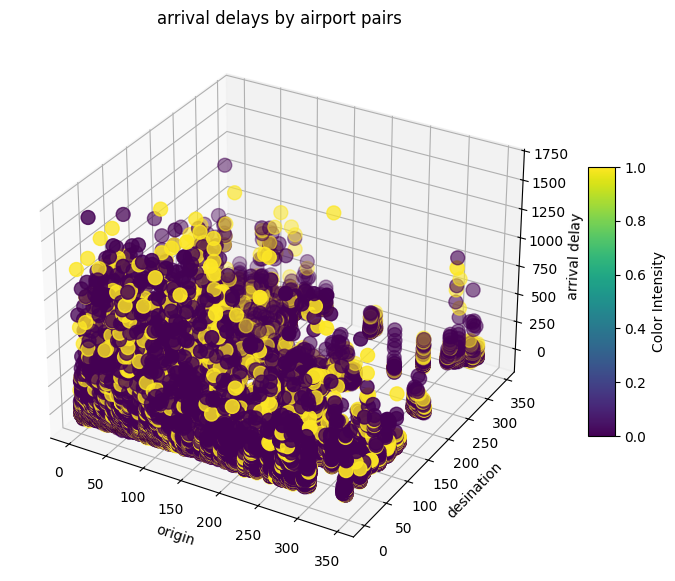

In [10]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using DataFrame columns
scatter = ax.scatter(
    df['ORIGIN_AIRPORT_ID'], df['DEST_AIRPORT_ID'], df['ARR_DELAY'], 
    c=df['is_weekend'], cmap='viridis', s=100
)

# Add labels and title
ax.set_xlabel("origin")
ax.set_ylabel("desination")
ax.set_zlabel("arrival delay")
ax.set_title("arrival delays by airport pairs")

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Color Intensity')

# Show the plot
plt.show()

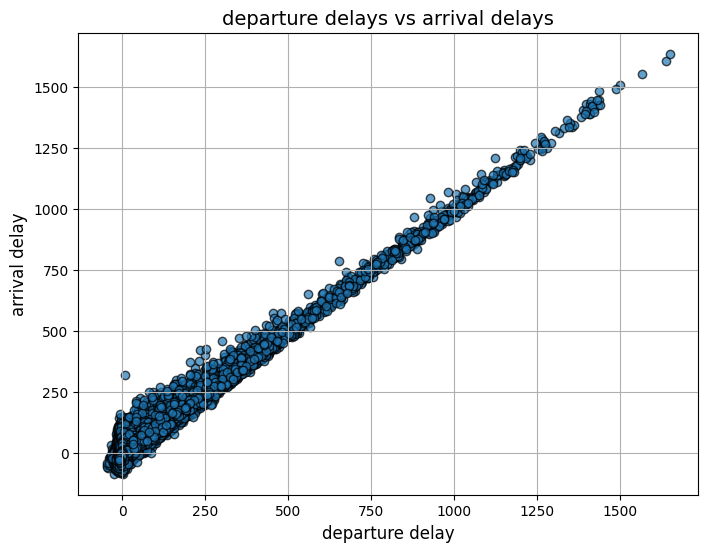

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['DEP_DELAY'], df['ARR_DELAY'], alpha=0.7, edgecolor='k')
plt.title('departure delays vs arrival delays', fontsize=14)
plt.xlabel('departure delay', fontsize=12)
plt.ylabel('arrival delay', fontsize=12)
plt.grid(True)
plt.show()

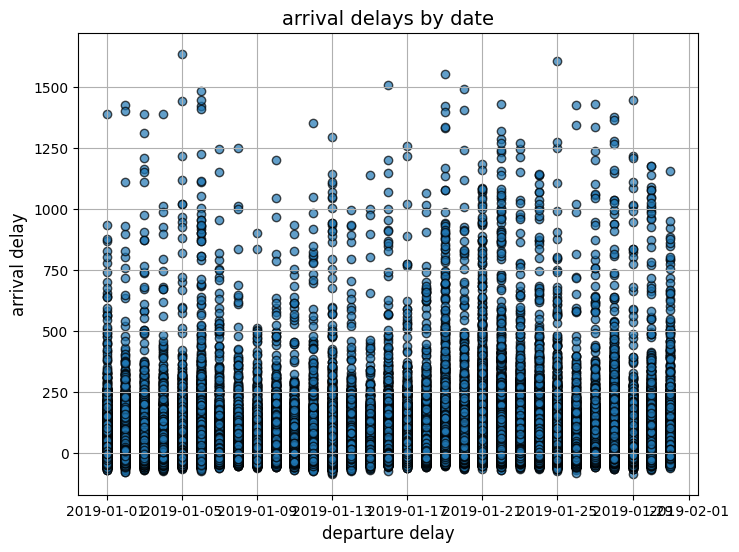

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['FL_DATE'], df['ARR_DELAY'], alpha=0.7, edgecolor='k')
plt.title('arrival delays by date', fontsize=14)
plt.xlabel('departure delay', fontsize=12)
plt.ylabel('arrival delay', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
columns = df_missing.columns
mi_matrix = pd.DataFrame(index=columns, columns=columns)

for col1 in columns:
    for col2 in columns:
        mi_matrix.loc[col1, col2] = mutual_info_score(df[col1], df[col2])

mi_matrix = mi_matrix.astype(float)
# print(mi_matrix)